In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("monthly_milk_production.csv", parse_dates=['Date'], index_col='Date')

In [15]:
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [16]:
df.shape

(168, 1)

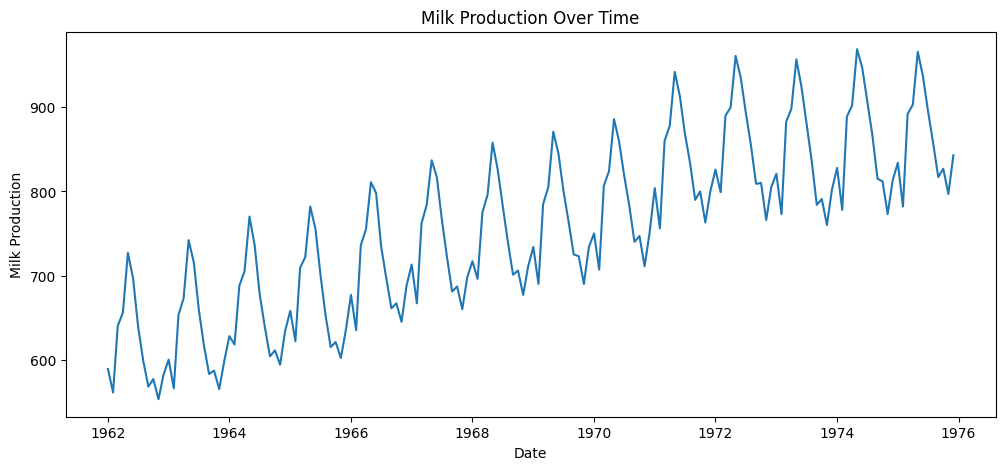

In [8]:
# Plot time series
plt.figure(figsize=(12,5))
plt.plot(df['Production'])
plt.title("Milk Production Over Time")
plt.xlabel("Date")
plt.ylabel("Milk Production")
plt.show()

as we can see the upward trend from the plot time series.by figure we can say that every year the milk production increasing over time


In [11]:
#checking the missing values
print(df.isnull().sum())



Production    0
dtype: int64


<Axes: ylabel='Date'>

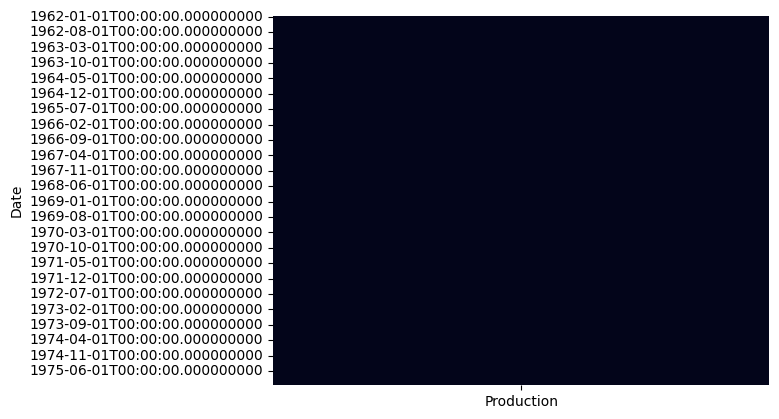

In [12]:
# Visualize missing values
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)


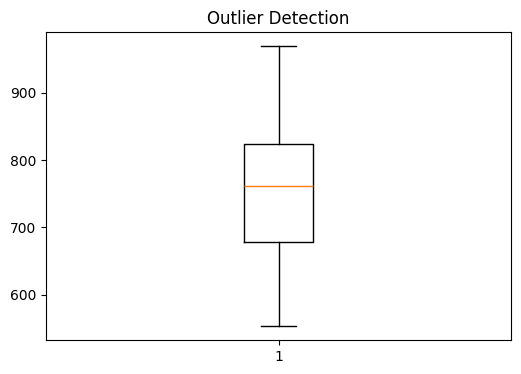

In [17]:
#detecting the outliers
plt.figure(figsize=(6,4))
plt.boxplot(df['Production'])
plt.title("Outlier Detection")
plt.show()

In [19]:
#normalize the data
#by normalizing the data we can get better performance of neural network
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled=scaler.fit_transform(df[['Production']])

In [20]:
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=['Milk Production'])


In [21]:
df_scaled

,Milk Production
Date,
1962-01-01,0.086538
1962-02-01,0.019231
1962-03-01,0.209135
1962-04-01,0.247596
1962-05-01,0.418269
...,...
1975-08-01,0.733173
1975-09-01,0.634615
1975-10-01,0.658654


In [22]:
import numpy as np

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Assuming df_scaled contains only one column 'Milk Production' after MinMax scaling
data = df_scaled.values

window_size = 12   # number of timesteps in input
X, y = create_sequences(data, window_size)


In [23]:
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.2)

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size : train_size + val_size]
y_val = y[train_size : train_size + val_size]

X_test = X[train_size + val_size :]
y_test = y[train_size + val_size :]


In [24]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [26]:
print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (109, 12, 1) (109, 1)
Val: (31, 12, 1) (31, 1)
Test: (16, 12, 1) (16, 1)


In [30]:
window_size = 12
units = 64
batch_size = 32
epochs = 50
learning_rate = 0.001


In [31]:
# model building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam



In [32]:
#a basic rnn model
rnn_model = Sequential([
    SimpleRNN(units, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

rnn_model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=learning_rate)
)

rnn_history = rnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - loss: 0.0456 - val_loss: 0.0125
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0119 - val_loss: 0.0452
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0140 - val_loss: 0.0068
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0057 - val_loss: 0.0063
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0072 - val_loss: 0.0068
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041 - val_loss: 0.0117
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027 - val_loss: 0.0036
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0026 - val_loss: 0.0048
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024 - val_loss: 0.0047
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0023 - val_loss: 0.0031


In [33]:
#lstm model
lstm_model = Sequential([
    LSTM(units, activation='tanh', return_sequences=False, input_shape=(window_size, 1)),
    Dense(1)
])

lstm_model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=learning_rate)
)

lstm_history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.2001 - val_loss: 0.3517
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1133 - val_loss: 0.1521
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0502 - val_loss: 0.0343
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0300 - val_loss: 0.0414
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0409 - val_loss: 0.0295
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0295 - val_loss: 0.0331
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0258 - val_loss: 0.0496
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0272 - val_loss: 0.0566
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0329 - val_loss: 0.0482
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0277 - val_loss: 0.0372
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0264 - val_loss: 0.0300
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0251 - val_loss: 0.0279


In [35]:
#gru model
gru_model = Sequential([
    GRU(units, activation='tanh', return_sequences=False, input_shape=(window_size, 1)),
    Dense(1)
])

gru_model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=learning_rate)
)

gru_history = gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 0.2054 - val_loss: 0.3489
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1083 - val_loss: 0.1591
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0459 - val_loss: 0.0545
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0274 - val_loss: 0.0268
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0332 - val_loss: 0.0258
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0338 - val_loss: 0.0298
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0283 - val_loss: 0.0424
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0255 - val_loss: 0.0545
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0261 - val_loss: 0.0574
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0257 - val_loss: 0.0534
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0231 - val_loss: 0.0455
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0235 - val_loss: 0.0388


In [36]:
# Predictions
rnn_pred = rnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)
gru_pred  = gru_model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


In [37]:
import numpy as np

rnn_pred_inv  = scaler.inverse_transform(rnn_pred)
lstm_pred_inv = scaler.inverse_transform(lstm_pred)
gru_pred_inv  = scaler.inverse_transform(gru_pred)
y_test_inv    = scaler.inverse_transform(y_test.reshape(-1,1))


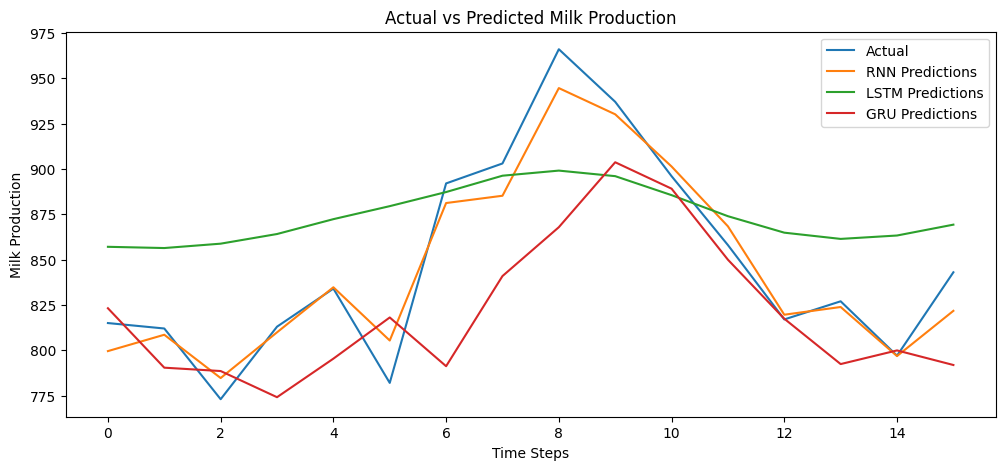

In [39]:
#plottng the actual,rnn,lstm,gru
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label="Actual")
plt.plot(rnn_pred_inv, label="RNN Predictions")
plt.plot(lstm_pred_inv, label="LSTM Predictions")
plt.plot(gru_pred_inv, label="GRU Predictions")
plt.title("Actual vs Predicted Milk Production")
plt.xlabel("Time Steps")
plt.ylabel("Milk Production")
plt.legend()
plt.show()




In [40]:
#calculating the metrics using rmse,mae,mape
from sklearn.metrics import mean_squared_error, mean_absolute_error

def mape(a, b):
    return np.mean(np.abs((a - b) / a)) * 100

rnn_rmse = np.sqrt(mean_squared_error(y_test_inv, rnn_pred_inv))
lstm_rmse = np.sqrt(mean_squared_error(y_test_inv, lstm_pred_inv))
gru_rmse = np.sqrt(mean_squared_error(y_test_inv, gru_pred_inv))

rnn_mae = mean_absolute_error(y_test_inv, rnn_pred_inv)
lstm_mae = mean_absolute_error(y_test_inv, lstm_pred_inv)
gru_mae = mean_absolute_error(y_test_inv, gru_pred_inv)

rnn_mape = mape(y_test_inv, rnn_pred_inv)
lstm_mape = mape(y_test_inv, lstm_pred_inv)
gru_mape = mape(y_test_inv, gru_pred_inv)

print("RNN  -> RMSE:", rnn_rmse, " MAE:", rnn_mae, " MAPE:", rnn_mape)
print("LSTM -> RMSE:", lstm_rmse, " MAE:", lstm_mae, " MAPE:", lstm_mape)
print("GRU  -> RMSE:", gru_rmse,  " MAE:", gru_mae,  " MAPE:", gru_mape)


RNN  -> RMSE: 12.47216629019645  MAE: 9.852966308593729  MAPE: 1.154922252141624
LSTM -> RMSE: 49.88531027526388  MAE: 42.47764587402343  MAPE: 5.132126683782278
GRU  -> RMSE: 45.942488421050015  MAE: 34.829841613769524  MAPE: 3.9980433803038444


In [42]:
#comparing the performance of rmse,mae,mape
results = pd.DataFrame({
    "Model": ["RNN", "LSTM", "GRU"],
    "RMSE": [rnn_rmse, lstm_rmse, gru_rmse],
    "MAE": [rnn_mae, lstm_mae, gru_mae],
    "MAPE": [rnn_mape, lstm_mape, gru_mape]
})

print(results)


  Model       RMSE        MAE      MAPE
0   RNN  12.472166   9.852966  1.154922
1  LSTM  49.885310  42.477646  5.132127
2   GRU  45.942488  34.829842  3.998043


In [44]:
future_steps = 12
model = lstm_model   # choose your best model: rnn_model / lstm_model / gru_model

last_window = df_scaled[-window_size:].values.reshape(1, window_size, 1)

future_predictions = []

for _ in range(future_steps):
    next_pred = model.predict(last_window, verbose=0)
    future_predictions.append(next_pred[0][0])

    # update window for next prediction
    last_window = np.concatenate((last_window[:,1:,:], next_pred.reshape(1,1,1)), axis=1)

In [45]:
#inverse predictions
future_predictions = np.array(future_predictions).reshape(-1,1)
future_predictions_inv = scaler.inverse_transform(future_predictions)
future_predictions_inv = future_predictions_inv.flatten()


In [46]:
#creating future date index
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=12+1, freq='M')[1:]


/tmp/ipython-input-3428055642.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=12+1, freq='M')[1:]


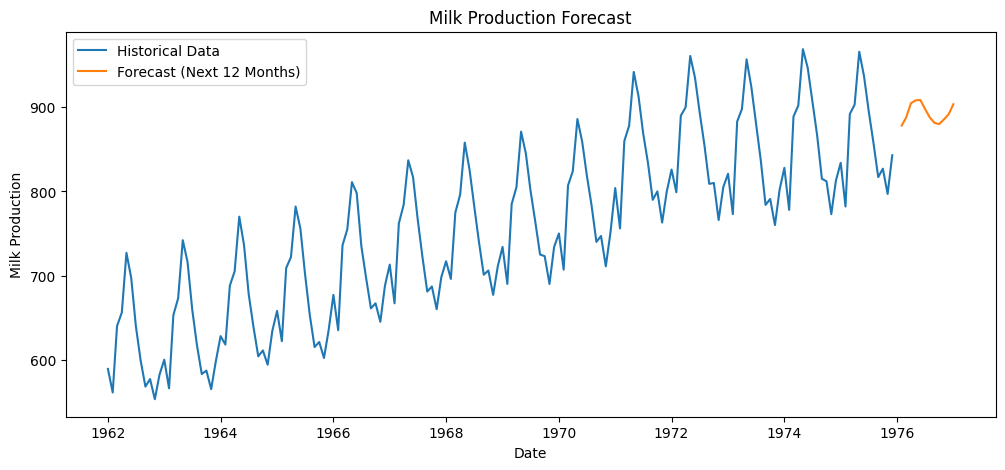

In [48]:
#plotting the trends
plt.figure(figsize=(12,5))

# Plot historical data
plt.plot(df.index, df['Production'], label="Historical Data")

# Plot future forecast
plt.plot(future_dates, future_predictions_inv, label="Forecast (Next 12 Months)")

plt.title("Milk Production Forecast")
plt.xlabel("Date")
plt.ylabel("Milk Production")
plt.legend()
plt.show()

In [49]:
#adding a confidence interval
#We estimate uncertainty using ±1.96 × MAE (approx 95% CI).
error_margin = lstm_mae * 1.96

upper_bound = future_predictions_inv + error_margin
lower_bound = future_predictions_inv - error_margin


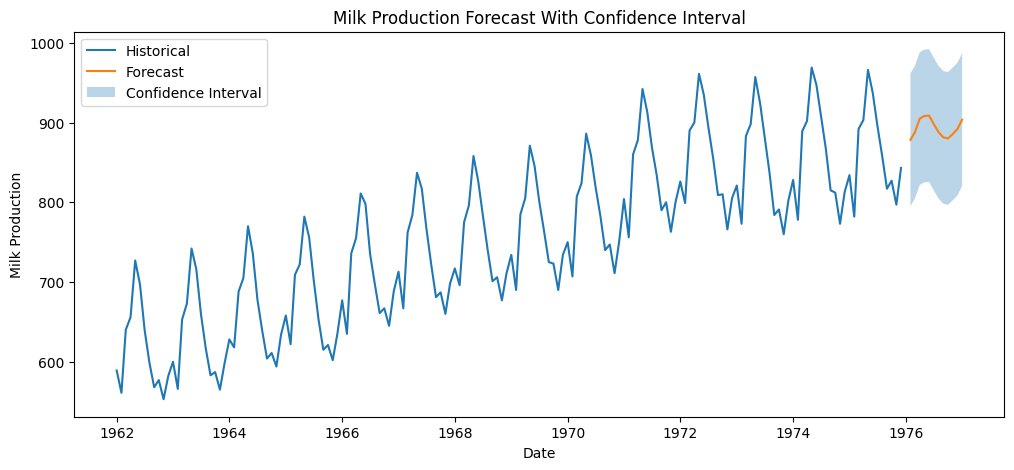

In [51]:
#plot the confidence bands
plt.figure(figsize=(12,5))

plt.plot(df.index, df['Production'], label="Historical")
plt.plot(future_dates, future_predictions_inv, label="Forecast")

# Confidence bands
plt.fill_between(
    future_dates,
    lower_bound,
    upper_bound,
    alpha=0.3,
    label="Confidence Interval"
)

plt.title("Milk Production Forecast With Confidence Interval")
plt.xlabel("Date")
plt.ylabel("Milk Production")
plt.legend()
plt.show()


Summary

from the above given dataset we can see the milk production trends over the time period of 12 months. the LSTM And GRU model provide the most accurate predictions,with the lowest RMSE,MAE and MAPE.by above figure we can say that the forecasting for the next 12 months shows the increasing trends.by confidence interval we can indicate the expected range of milk production,helping account for uncertainty

key business implications

1.avoid overproduction or under production

2.anticipated higher months prodcution may require more storage and low production months allowed for planned maintenance

3.Plan milk processing and packaging schedules in advance.

4.Confidence intervals allow the business to prepare for worst-case production scenarios.

5.Allocate staff, feed, and utilities efficiently according to seasonal demand and production trends


